In [1]:
import numpy as np
import matplotlib.pyplot as plt

from centrex_tlf import utils

In [26]:
transmission_per_pass = 0.8

locations_x = np.linspace(0,0.3,5)
locations_y = np.linspace(0,4,5)
order = utils.multipass.multipas_prism_order(5)

relative_intensities = [1*transmission_per_pass**(o-1) for o in order]

X,Y = np.meshgrid(np.linspace(-1,1,101), np.linspace(-1,5,101))

multipass_intensity = utils.multipass.generate_2d_multipass_gaussian_intensity(
    X, Y, locations_x, locations_y, relative_intensities, sigma_x = 0.2, sigma_y = 0.2
)

multipass_rabi = utils.multipass.generate_2d_multipass_gaussian_rabi(
    X, Y, locations_x, locations_y, relative_intensities, sigma_x = 0.2, sigma_y = 0.2, 
    coupling=0.5
)

multipass_intensity /= multipass_intensity.max()
multipass_rabi /= multipass_rabi.max()

Text(0, 0.5, 'y')

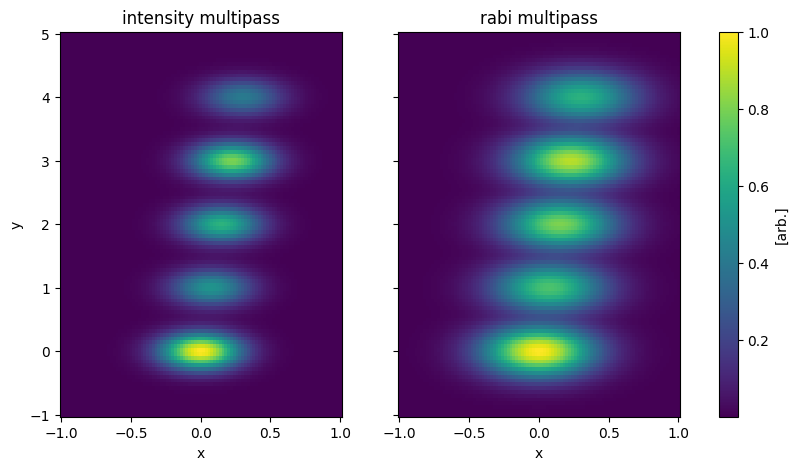

In [27]:
fig, axes = plt.subplots(ncols = 2, figsize = (10,5), sharey=True)

c = axes[0].pcolormesh(X,Y,multipass_intensity)
c = axes[1].pcolormesh(X,Y,multipass_rabi)

cbar = fig.colorbar(c, ax = axes.ravel().tolist())
cbar.ax.set_ylabel("[arb.]")

axes[0].set_title("intensity multipass")
axes[1].set_title("rabi multipass")

axes[0].set_xlabel("x")
axes[1].set_xlabel("x")
axes[0].set_ylabel("y")


Because the rabi rate is proportional to the √ of the intensity in rabi rate units the multipass is stretched out.
For a single gaussian this would be the equivalent of multipyling the standard deviation by √2.